# Comparison of gene structure across Hymenoptera

Quartets of gene models whose protein products are conserved as single-copy orthologs in at least one ant, one bee, one vespid wasp, and one parasitic (chalcid) wasp.
Length and composition of exons, introns and coding sequences is shown

## Front matter

Define a few helper functions.
Skip if you're not interested in the programming.

In [1]:
import math
import matplotlib
import matplotlib.pyplot as pyplot
import pandas
import seaborn

def do_boxplot(df, index, groupby, color='skyblue', widths=0.45, fontsize=16, xlog=False, ylog=False,
               xlabel='', ylabel='', title='', suptitle='', xlim=None, ylim=None):
    seaborn.set_palette("deep", desat=.6)
    seaborn.set_style("darkgrid")
    seaborn.set_context({"figure.figsize": (12, 5)})

    axes = seaborn.boxplot(df[index], df[groupby], color=color, widths=widths)
    if xlog is True:
        axes.set_xscale('log')
    if ylog is True:
        axes.set_yscale('log')
    _ = pyplot.xticks(fontsize=fontsize)
    _ = pyplot.yticks(fontsize=fontsize)
    _ = pyplot.xlabel(xlabel, fontsize=fontsize)
    _ = pyplot.ylabel(ylabel, fontsize=fontsize)
    _ = pyplot.title(title, fontsize=fontsize)
    _ = pyplot.suptitle(suptitle, fontsize=fontsize)
    if xlim is not None:
        _ = pyplot.xlim(xlim)
    if ylim is not None:
        _ = pyplot.ylim(ylim)


def lineage(row):
    if row['Species'] in ['Acep', 'Aech', 'Cflo', 'Hsal', 'Pbar', 'Sinv']:
        return 'Ants'
    if row['Species'] in ['Ador', 'Aflo', 'Amel', 'Bimp', 'Bter', 'Mrot']:
        return 'Bees'
    if row['Species'] == 'Pdom':
        return 'Vespids'
    if row['Species'] == 'Nvit':
        return 'Chalcids'
    assert False

## Exons

In [2]:
exons = pandas.io.parsers.read_table("../data/exons-hirep.tsv")
exons['Lineage'] = exons.apply(lineage, axis=1)
exons.head()

,Species,ExonPos,MrnaId,Length,GCContent,GCSkew,NContent,Context,Phase,Remainder,Lineage
0,Acep,NW_012130065.1_45993-46154-,mRNA4,162,0.401,0.046,0,stop,None,None,Ants
1,Acep,NW_012130065.1_46782-46892-,mRNA4,111,0.396,0.136,0,start,None,None,Ants
2,Acep,NW_012130065.1_180903-180953+,mRNA9,51,0.353,0.333,0,start,None,None,Ants
3,Acep,NW_012130065.1_181024-181137+,mRNA9,114,0.325,0.189,0,cds,0,0,Ants
4,Acep,NW_012130065.1_181217-181311+,mRNA9,95,0.368,0.371,0,cds,0,2,Ants


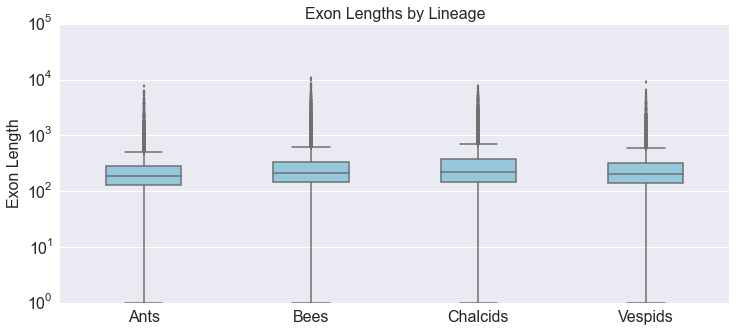

In [3]:
%matplotlib inline
do_boxplot(exons, index='Length', groupby='Lineage', ylabel='Exon Length', ylog=True,
           title='Exon Lengths by Lineage')

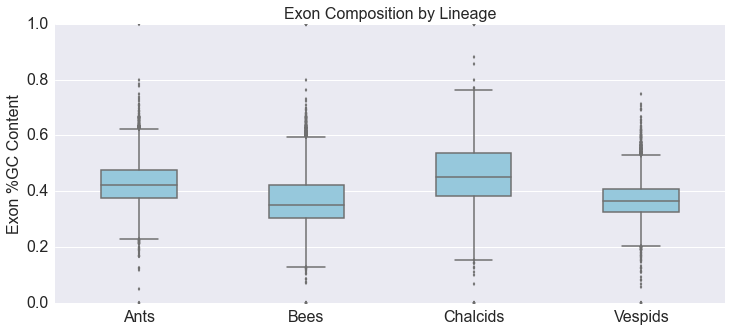

In [4]:
%matplotlib inline
do_boxplot(exons, index='GCContent', groupby='Lineage', ylabel='Exon %GC Content',
           title='Exon Composition by Lineage')

## Introns

In [5]:
introns = pandas.io.parsers.read_table("../data/introns-hirep.tsv")
introns['Lineage'] = introns.apply(lineage, axis=1)
introns.head()

,Species,IntronPos,MrnaId,Length,GCContent,GCSkew,NContent,Context,Lineage
0,Acep,NW_012130065.1_46155-46781-,mRNA4,627,0.219,0.139,0,cds,Ants
1,Acep,NW_012130065.1_180954-181023+,mRNA9,70,0.229,0.000,0,cds,Ants
2,Acep,NW_012130065.1_181138-181216+,mRNA9,79,0.139,-0.091,0,cds,Ants
3,Acep,NW_012130065.1_181312-181499+,mRNA9,188,0.170,0.188,0,cds,Ants
4,Acep,NW_012130065.1_181771-181855+,mRNA9,85,0.224,0.368,0,cds,Ants


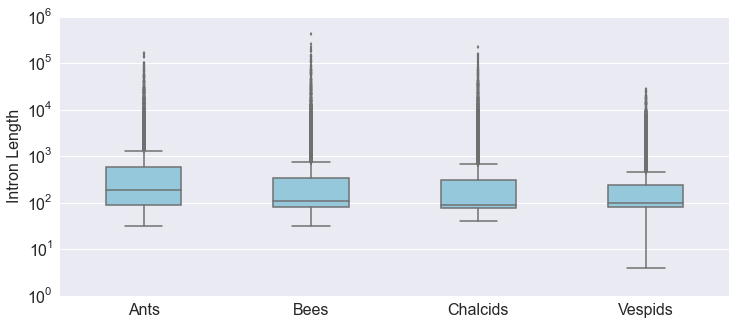

In [6]:
%matplotlib inline
do_boxplot(introns, index='Length', groupby='Lineage', ylabel='Intron Length', ylog=True)

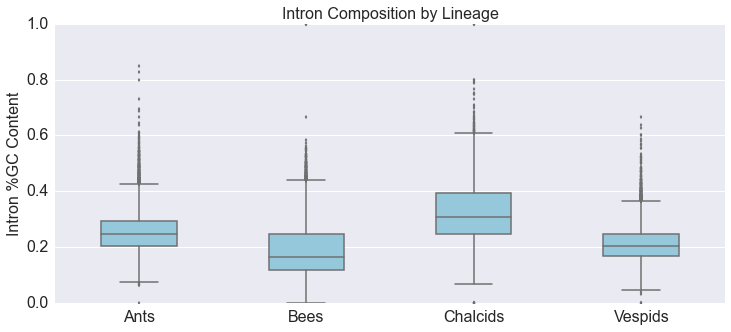

In [7]:
%matplotlib inline
do_boxplot(introns, index='GCContent', groupby='Lineage', ylabel='Intron %GC Content',
           title='Intron Composition by Lineage')

## Coding sequences

In [8]:
cdss = pandas.io.parsers.read_table("../data/cds-hirep.tsv")
cdss['Lineage'] = cdss.apply(lineage, axis=1)
cdss.head()

,Species,CdsId,MrnaId,Length,GCContent,GCSkew,NContent,Lineage
0,Acep,CDS4,mRNA4,270,0.404,0.083,0,Ants
1,Acep,CDS9,mRNA9,1767,0.345,0.125,0,Ants
2,Acep,CDS24,mRNA24,435,0.384,0.018,0,Ants
3,Acep,CDS26,mRNA26,1671,0.427,0.086,0,Ants
4,Acep,CDS30,mRNA30,4494,0.504,0.030,0,Ants


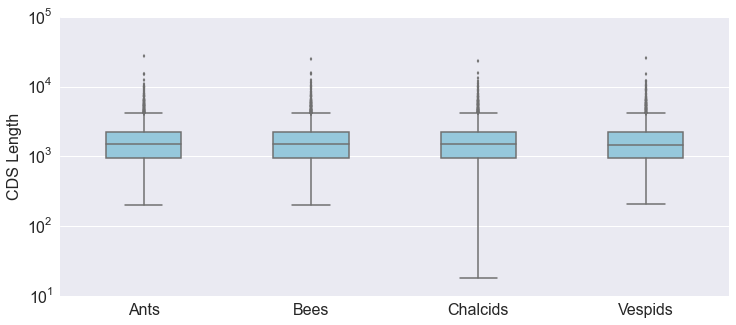

In [9]:
%matplotlib inline
do_boxplot(cdss, index='Length', groupby='Lineage', ylabel='CDS Length', ylog=True)

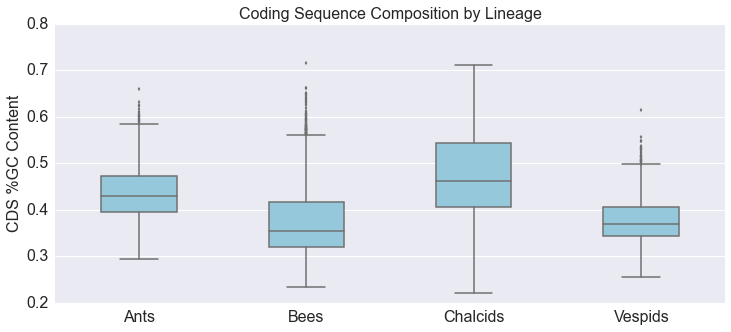

In [10]:
%matplotlib inline
do_boxplot(cdss, index='GCContent', groupby='Lineage', ylabel='CDS %GC Content',
           title='Coding Sequence Composition by Lineage')